# Programming IBM Superconducting Qubits with Qiskit  (Part 1/2)

## Rudy Raymond H.P. (Doctor of Informatics, Kyoto University)

## IBM Research 

Please visit www.qiskit.org for more details on an open source quantum computing framework for writing quantum experiments, programs, and applications.

In [2]:
import slides

Hello Korea, Hello KIAS, Hello Superconducting Quantum Information ... 


In [2]:
slides.kias()

In [3]:
slides.lab()

In [4]:
slides.system()

In [5]:
slides.transmon()

In [6]:
slides.superposition()

In [7]:
slides.interference()

In [8]:
slides.entangled()

In [9]:
slides.algorithm()

In [10]:
slides.ibmqx()

True

In [11]:
slides.qiskit()

True

In [12]:
slides.elements()

In [13]:
slides.git()

True

In [14]:
#from qiskit import IBMQ
#IBMQ.save_account("d05e9f4bd7c3c44abc479d5024349ae556b78df9dd26fc09bdae0ab12e432fd29da1ac218d0513408764fce1182d404de91e1fa4ca3f59c17da9ae5615e159e2")

In [15]:
from qiskit import IBMQ
IBMQ.load_accounts()
#if there's a trouble see: https://github.com/Qiskit/qiskit-tutorial/blob/master/INSTALL.md

In [ ]:
IBMQ.backends()

In [ ]:
IBMQ.backends(n_qubits=5)

In [ ]:
from qiskit.backends.ibmq import least_busy
least_busy(IBMQ.backends(n_qubits=5))

In [19]:
for backend in IBMQ.backends(simulator=False):
    print(backend.status())

{'pending_jobs': 0, 'name': 'ibmqx4', 'operational': True}
{'pending_jobs': 9, 'name': 'ibmqx5', 'operational': False}
{'pending_jobs': 0, 'name': 'ibmqx2', 'operational': False}
{'pending_jobs': 10, 'name': 'ibmq_16_melbourne', 'operational': True}


In [20]:
slides.ibmq_qcc()

In [21]:
slides.quantum()

thanks omgcatsinspace for the permission to use the quantum cat

In [22]:
slides.model()

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
from qiskit import Aer

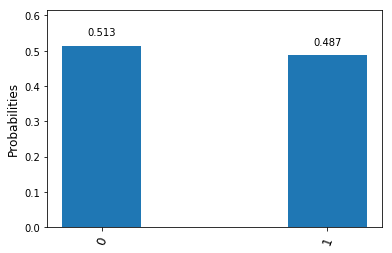

In [24]:
# Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuit
qc = QuantumCircuit(q, c)
qc.h(q)

#-----

qc.measure(q, c)

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

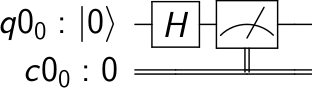

In [25]:
circuit_drawer(qc)

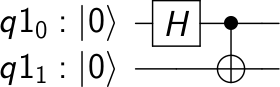

In [26]:
# Quantum Registers
q = QuantumRegister(2)

# Build the circuit
bell = QuantumCircuit(q)
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw the circuit
circuit_drawer(bell)

In [27]:
c2 = ClassicalRegister(2)

# Measurement in standard basis
meas_zi = QuantumCircuit(q, c) 
meas_zi.measure(q[0], c[0])

# Measurement in superposition basis
meas_xi = QuantumCircuit(q, c)
meas_xi.h(q[0])
meas_xi.measure(q[0], c[0])

# Joint measurement in standard basis
meas_zz = QuantumCircuit(q, c2) 
meas_zz.measure(q, c2)

# Joint measurement in superposition basis
meas_xx = QuantumCircuit(q, c2) 
meas_xx.h(q)
meas_xx.measure(q, c2)

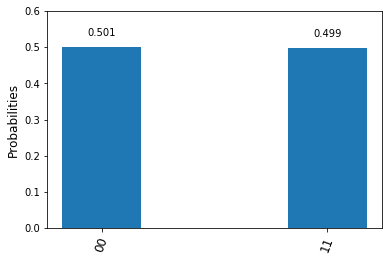

In [28]:
# Execute the circuit
qc = bell+meas_zz
result = execute(qc, backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

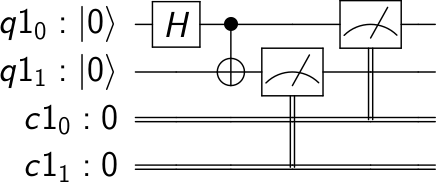

In [29]:
circuit_drawer(qc)

running it on  ibmqx4
Status @ 0 seconds
JobStatus.INITIALIZING
None
JobStatus.DONE


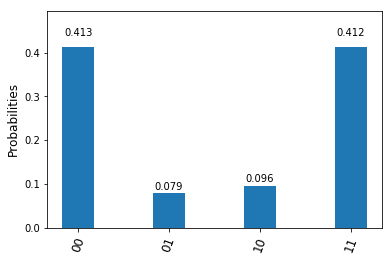

In [30]:
# let's choose a device and 
device = least_busy(IBMQ.backends(simulator=False))
print('running it on ', device)
qc = bell+meas_zz
job = execute(qc, device)

import time
lapse = 0
interval = 10
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [31]:
# Build the circuit
superpositon = QuantumCircuit(q) 
oracle = QuantumCircuit(q) 
amplitude_amp = QuantumCircuit(q) 


#Make superposition off all
superpositon.h(q)

#encode the oracle 
test = '01'
if test == '00':
    oracle.z(q)
    oracle.cz(q[0], q[1])   
if test == '10':
    oracle.z(q[1])
    oracle.cz(q[0], q[1])  
if test == '01':
    oracle.z(q[0])
    oracle.cz(q[0], q[1])    
if test == '11':
    oracle.cz(q[0], q[1])


#amplitude amplifcation
amplitude_amp.h(q)
amplitude_amp.z(q)
amplitude_amp.cz(q[0], q[1])
amplitude_amp.h(q)


grover = superpositon+oracle+amplitude_amp

qc = grover+meas_zz

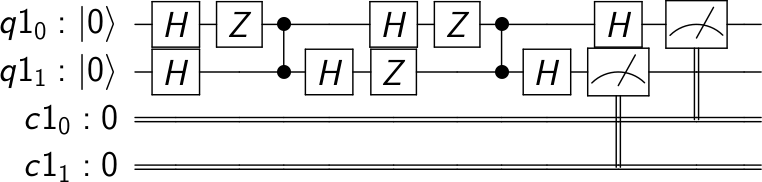

In [32]:
circuit_drawer(qc)

In [33]:
# Execute the circuit
result = execute(qc, backend, shots=1).result()

print(result.get_counts(qc))

{'01': 1}


running it on  ibmqx4
Status @ 0 seconds
JobStatus.INITIALIZING
None
Status @ 60 seconds
JobStatus.QUEUED
1
Status @ 120 seconds
JobStatus.QUEUED
1
JobStatus.DONE


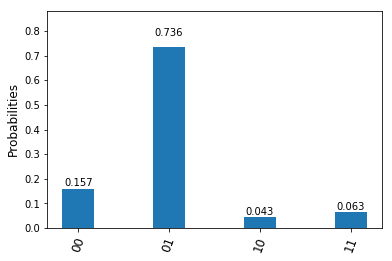

In [34]:
# let's choose a device and 
device = least_busy(IBMQ.backends(simulator=False))
print('running it on ', device)
qc = grover+meas_zz
job = execute(qc, device)

lapse = 0
interval = 10
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [35]:
slides.entangled()

In [36]:
slides.entanglement()

In [37]:
slides.aqua()

In [2]:
slides.execution()

In [3]:
slides.papers()

In [4]:
slides.community()

In [3]:
slides.thanks()